In [46]:
import copy 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from scipy.optimize import minimize 
import IESDS
import order_k
import BFPSNS
import Linear_programming
from scipy.optimize import minimize_scalar

import nashpy as nash

# this module contains the data
import hst 

#### 3.1 Find den symmetriske Nash-ligevægt

In [47]:
def demand1(p1,p2):
    return np.exp(v1(p1))/(1+np.exp(v1(p1))+ np.exp(v2(p2)))

def demand2(p1,p2):
    return np.exp(v2(p2))/(1+np.exp(v1(p1))+ np.exp(v2(p2)))

def v1(p1):
    return 3-p1

def v2(p2):
    return 3-p2

def profit1(p1,p2,c=1):
    return (p1-c)*demand1(p1,p2)

def profit2(p1,p2,c=1):
    return (p2-c)*demand2(p1,p2)

p0 = np.array([0.5,0.5])


Symmetric Nash price: p* ≈ 2.5990
Symmetric Nash price: p* ≈ 2.5990


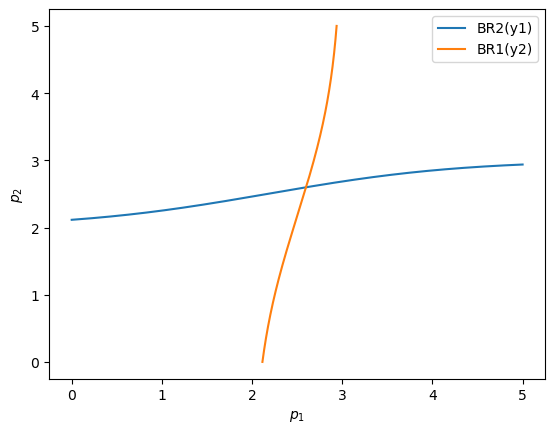

In [48]:
from scipy.optimize import fsolve
##NASH
# The Nash equilibrium is found where both players are best responding to each other. 
# We write the best response functions as numerical functions here; then we can re-use 
# them in other settings too 
def BR2(p1,c2=1): 
    f = lambda p2 : -profit2(p2=p2,p1=p1,c=c2)
    res = minimize(f, p0[1])
    p2 = res.x[0]
    return p2
    
def BR1(p2):
    f = lambda p1 : -profit1(p1=p1,p2=p2)
    res = minimize(f, p0[0])
    p1 = res.x[0]
    return p1

pp = np.linspace(0., 5., 200)
pp1 = np.empty(pp.shape)
pp2 = np.empty(pp.shape)
for i,p in enumerate(pp): 
    pp1[i] = BR1(p)
    pp2[i] = BR2(p,c2=1)

plt.plot(pp, pp2, label=f'BR2(y1)')
plt.plot(pp1, pp, label=f'BR1(y2)')
plt.legend(); 
plt.xlabel('$p_1$');
plt.ylabel('$p_2$');

def eq1(p):
    return p - BR1(p)

def eq2(p):
    return p - BR2(p,c2=1)

# find p*
p_star1, = fsolve(eq1, 0.5)
p_star2, = fsolve(eq2, 0.5)
print(f"Symmetric Nash price: p* ≈ {p_star1:.4f}")
print(f"Symmetric Nash price: p* ≈ {p_star2:.4f}")

In [49]:
def profit(x, c=1): 
    p1, p2 = x
    return profit1(p1, p2, c) + profit2(p1, p2, c)

f = lambda x : -profit(x)
res = minimize(f, p0)

print(res.x)

[3.37482644 3.37482644]


In [50]:
#Profit i samarbejdsstadiet
print(profit1(3.37482644,3.37482644,c=1))
print(profit2(3.37482644,3.37482644,c=1))

#Profit i nashstadiet
print(profit1(2.5990,2.5990,c=1))
print(profit2(2.5990,2.5990,c=1))

#Profit i afvigelse
from scipy.optimize import minimize_scalar

res_hat = minimize_scalar(
    lambda p: -profit1(p1=p, p2=3.37482644, c=1),
    bounds=(0, 5),
    method='bounded'
)
pi_hat = profit1(res_hat.x, p2=3.37482644, c=1)
pi_hat2 = profit2(res_hat.x, p2=3.37482644, c=1)
print("Optimal pi ved afvigelse:", pi_hat)
print("Optimal pi ved afvigelse:", pi_hat2)

minimum_delta = (0.7562-0.6874)/(0.7562-0.5989)
print("Minimum delta for cooperation:", minimum_delta)

0.6874112640895969
0.6874112640895969
0.5989549054898694
0.5989549054898694
Optimal pi ved afvigelse: 0.7562238647205833
Optimal pi ved afvigelse: 0.5508669384848593
Minimum delta for cooperation: 0.4373808010171645


#### 4.

In [51]:
c2 = np.linspace(1/2, 3/2, 100)
print(c2)

[0.5        0.51010101 0.52020202 0.53030303 0.54040404 0.55050505
 0.56060606 0.57070707 0.58080808 0.59090909 0.6010101  0.61111111
 0.62121212 0.63131313 0.64141414 0.65151515 0.66161616 0.67171717
 0.68181818 0.69191919 0.7020202  0.71212121 0.72222222 0.73232323
 0.74242424 0.75252525 0.76262626 0.77272727 0.78282828 0.79292929
 0.8030303  0.81313131 0.82323232 0.83333333 0.84343434 0.85353535
 0.86363636 0.87373737 0.88383838 0.89393939 0.9040404  0.91414141
 0.92424242 0.93434343 0.94444444 0.95454545 0.96464646 0.97474747
 0.98484848 0.99494949 1.00505051 1.01515152 1.02525253 1.03535354
 1.04545455 1.05555556 1.06565657 1.07575758 1.08585859 1.0959596
 1.10606061 1.11616162 1.12626263 1.13636364 1.14646465 1.15656566
 1.16666667 1.17676768 1.18686869 1.1969697  1.20707071 1.21717172
 1.22727273 1.23737374 1.24747475 1.25757576 1.26767677 1.27777778
 1.28787879 1.2979798  1.30808081 1.31818182 1.32828283 1.33838384
 1.34848485 1.35858586 1.36868687 1.37878788 1.38888889 1.39898

/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


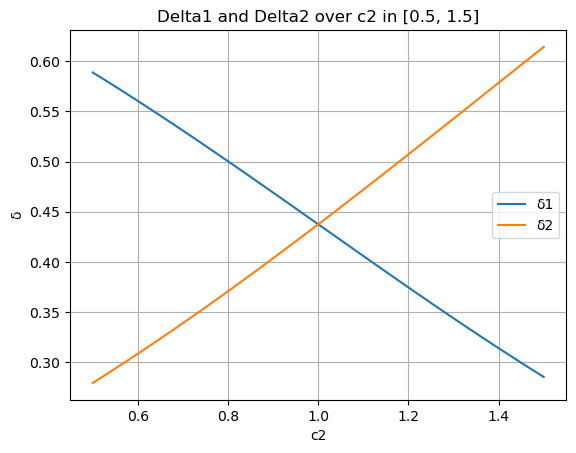

In [60]:
def calc_delta(c2_list):
    delta1 = []
    delta2 = []
    for j in c2_list:
        # 1) Find NE prices
        def eq1(p): return p - BR1(p)
        def eq2(p): return p - BR2(p, c2=j)
        p_star1, = fsolve(eq1, 0.5)
        p_star2, = fsolve(eq2, 0.5)

        # Compute NE profits
        pi_NE1 = profit1(p_star1, p_star2, c=1)
        pi_NE2 = profit2(p_star1, p_star2, c=j)

        # 2) Find cartel prices
        def cartel_profit(x):
            p1, p2 = x
            return -(profit1(p1, p2, c=1) + profit2(p1, p2, c=j))

        # Use NE prices as initial guess
        res_cartel = minimize(
            cartel_profit,
            x0=[p_star1, p_star2],
            bounds=[(0, 5), (0, 5)]
        )
        cartel1, cartel2 = res_cartel.x

        # Compute cartel profits
        pi_C1 = profit1(cartel1, cartel2, c=1)
        pi_C2 = profit2(cartel1, cartel2, c=j)

        res_hat1 = minimize_scalar(
            lambda p: -profit1(p, cartel2, c=1),
            bounds=(0, 5),
            method='bounded'
        )
        hat1 = profit1(res_hat1.x, cartel2, c=1)

        res_hat2 = minimize_scalar(
            lambda p: -profit2(cartel1, p, c=j),
            bounds=(0, 5),
            method='bounded'
        )
        hat2 = profit2(cartel1, res_hat2.x, c=j)

        # Compute deltas
        d1 = (hat1 - pi_C1) / (hat1 - pi_NE1)
        d2 = (hat2 - pi_C2) / (hat2 - pi_NE2)

        delta1.append(d1)
        delta2.append(d2)

    return np.array(delta1), np.array(delta2)

# Prepare c2 array
c2 = np.linspace(0.5, 1.5, 100)

# Calculate deltas
delta1, delta2 = calc_delta(c2)

# Plot
plt.figure()
plt.plot(c2, delta1, label='δ1')
plt.plot(c2, delta2, label='δ2')
plt.xlabel('c2')
plt.ylabel('δ')
plt.title('Delta1 and Delta2 over c2 in [0.5, 1.5]')
plt.legend()
plt.grid(True)
plt.show()

